# 1.Import libraries and objects

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import sklearn as sk
from matplotlib.backends.backend_pdf import PdfPages
import re
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
import time
import math
from math import sqrt
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 2. Functions

## 2.1 Load data

In [2]:
def load(handel,old_handel):
    dfe=pd.read_csv(handel,index_col=None)
    df1=pd.read_csv(r"C:\Users\mamr4\OneDrive\Documents\Master thesis\Data\peridic.csv",index_col=None)
    dfe= dfe.loc[:, ~dfe.columns.str.contains('^Unnamed')]
    nul=[np.NaN]*len(dfe.Molecule)
    for char in ['e1','e2']:
        dfe[char]=nul
    for char in df1.Symbol:
        ind1=dfe.loc[dfe['Molecule'].str.contains(r'^'+char+r'\D')].index.values
        ind2=dfe.loc[dfe['Molecule'].str.contains(char+r'$')].index.values
        ind3=dfe.loc[dfe['Molecule'].str.contains(r'^'+char+r'2')].index.values
        #print(char)
        #print(df1[df1.Symbol==char].Period.values)
        dfe.loc[ind1,'e1']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind2,'e2']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind3,'e1']=df1[df1.Symbol==char].NumberofElectrons.values[0]
        dfe.loc[ind3,'e2']=df1[df1.Symbol==char].NumberofElectrons.values[0]
    g=dfe
    g['n1']=g.A1-g.e1
    g['n2']=g.A2-g.e2
    g.loc[g.atom2=='H','p2']=[1]*len(g.loc[g.atom2=='H']['p2'])
    g.loc[g.atom1=='H','p1']=[1]*len(g.loc[g.atom1=='H']['p1'])
    g.loc[g.atom2=='H','g2_lan_act']=[1]*len(g.loc[g.atom2=='H']['g2_lan_act'])
    g.loc[g.atom1=='H','g1_lan_act']=[1]*len(g.loc[g.atom1=='H']['g1_lan_act'])
    
    
    
    g.loc[g.atom2=='D','p2']=[1]*len(g.loc[g.atom2=='D']['p2'])
    g.loc[g.atom1=='D','p1']=[1]*len(g.loc[g.atom1=='D']['p1'])
    g.loc[g.atom2=='T','p2']=[1]*len(g.loc[g.atom2=='T']['p2'])
    g.loc[g.atom1=='T','p1']=[1]*len(g.loc[g.atom1=='T']['p1'])
    g.loc[g.atom2=='D','g2']=[1]*len(g.loc[g.atom2=='D']['g2'])
    g.loc[g.atom1=='D','g1']=[1]*len(g.loc[g.atom1=='D']['g1'])
    g.loc[g.atom2=='T','g2']=[1]*len(g.loc[g.atom2=='T']['g2'])
    g.loc[g.atom1=='T','g1']=[1]*len(g.loc[g.atom1=='T']['g1'])
    g.loc[g.atom2=='D','g2_lan_act']=[1]*len(g.loc[g.atom2=='D']['g2_lan_act'])
    g.loc[g.atom1=='D','g1_lan_act']=[1]*len(g.loc[g.atom1=='D']['g1_lan_act'])
    g.loc[g.atom2=='T','g2_lan_act']=[1]*len(g.loc[g.atom2=='T']['g2_lan_act'])
    g.loc[g.atom1=='T','g1_lan_act']=[1]*len(g.loc[g.atom1=='T']['g1_lan_act'])
    g.loc[g.atom2=='D','g2_lan_act_iso']=[0]*len(g.loc[g.atom2=='D']['g2_lan_act_iso'])
    g.loc[g.atom1=='D','g1_lan_act_iso']=[0]*len(g.loc[g.atom1=='D']['g1_lan_act_iso'])
    g.loc[g.atom2=='T','g2_lan_act_iso']=[-1]*len(g.loc[g.atom2=='T']['g2_lan_act_iso'])
    g.loc[g.atom1=='T','g1_lan_act_iso']=[-1]*len(g.loc[g.atom1=='T']['g1_lan_act_iso'])
    g.loc[g.atom2=='H','g2_lan_act_iso']=[1]*len(g.loc[g.atom2=='H']['g2_lan_act_iso'])
    g.loc[g.atom1=='H','g1_lan_act_iso']=[1]*len(g.loc[g.atom1=='H']['g1_lan_act_iso'])
    g['sum_p']=g['p1']+g['p2']
    g['sum_g']=g.g1_lan_act+g.g2_lan_act
    g['diff_p']=abs(g['p1']-g['p2'])
    g['diff_g']=abs(g['g1_lan_act']-g['g2_lan_act'])
    g['product_p']=g['p1']*g['p2']
    g['product_g']=g['g1_lan_act']*g['g1_lan_act']
    g['Reduced_g']=(g.g1_lan_act*g.g2_lan_act)/(g.g1_lan_act+g.g2_lan_act)
    g['Reduced_p']=(g.p1*g.p2)/(g.p1+g.p2)
    g['g_average']=(g.g1+g.g2)/2
    g['g_average_lan_act']=(g.g1_lan_act+g.g2_lan_act)/2
    g['g_average_lan_act_iso']=(g.g1_lan_act_iso+g.g2_lan_act_iso)/2
    g['Re (\AA)^-1']=1/((g['Re (\AA)']))
    g['Re (au)']=((g['Re (\AA)'])*1.8897259885789)
    g['Re (au)^-1']=1/((g['Re (\AA)'])*1.8897259885789)
    g['Re (au)^2']=((g['Re (\AA)'])*1.8897259885789)**2
    g['Re (au)^-2']=1/g['Re (au)^2']
    g['4*(np.pi**2)*Re (au)']=(4*(np.pi**2)*(g['Re (\AA)'])*1.8897259885789)
    g['4*(np.pi**2)*Re (au)^-1']=1/(4*(np.pi**2)*(g['Re (\AA)'])*1.8897259885789)
    g['omega_e (au)^-2']=1/((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['4*(np.pi**2)*omega_e (au)^-2']=1/((2*(np.pi)*g['omega_e (cm^{-1})']*0.0000046)**2)
    g['omega_e (au)']=(g['omega_e (cm^{-1})']*(0.0000046))
    g['omega_e (au)^2']=((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['4*(np.pi**2)*omega_e (au)^2']=4*(np.pi**2)*((g['omega_e (cm^{-1})']*(0.0000046))**2)
    g['K']=(4*(np.pi**2)*((g['omega_e (cm^{-1})'])**2)*g['Reduced mass'])
    g['sqrt(K)']=np.sqrt(4*(np.pi**2)*((g['omega_e (cm^{-1})'])**2)*g['Reduced mass'])
    g['4*(np.pi**2)*omega_e (au)']=4*(np.pi**2)*((g['omega_e (cm^{-1})']*(0.0000046)))
    g['4*(np.pi**2)*Re (au)*omega_e (au)^2']=g['4*(np.pi**2)*Re (au)']*((g['omega_e (cm^{-1})']*0.0000046)**2)
    g['ve1']=g['g1_lan_act']
    g['ve2']=g['g2_lan_act']
    g['log(D_e)/(R_e^3*Z_1*Z_2)']=np.log((g["D0 (eV)"]*0.037)/((g["Re (au)"]**3)*g.e1*g.e2))
    g.loc[g.g2_lan_act==18,'ve2']=[0]*len(g.loc[g.g2_lan_act==18]['g2_lan_act'])
    g.loc[g.g1_lan_act==18,'ve1']=[0]*len(g.loc[g.g1_lan_act==18]['g1_lan_act'])
    g.loc[g.g2_lan_act==17,'ve2']=[7]*len(g.loc[g.g2_lan_act==17]['g2_lan_act'])
    g.loc[g.g1_lan_act==17,'ve1']=[7]*len(g.loc[g.g1_lan_act==17]['g1_lan_act'])
    g.loc[g.g2_lan_act==16,'ve2']=[6]*len(g.loc[g.g2_lan_act==16]['g2_lan_act'])
    g.loc[g.g1_lan_act==16,'ve1']=[6]*len(g.loc[g.g1_lan_act==16]['g1_lan_act'])
    g.loc[g.g2_lan_act==15,'ve2']=[5]*len(g.loc[g.g2_lan_act==15]['g2_lan_act'])
    g.loc[g.g1_lan_act==15,'ve1']=[5]*len(g.loc[g.g1_lan_act==15]['g1_lan_act'])
    g.loc[g.g2_lan_act==14,'ve2']=[4]*len(g.loc[g.g2_lan_act==14]['g2_lan_act'])
    g.loc[g.g1_lan_act==14,'ve1']=[4]*len(g.loc[g.g1_lan_act==14]['g1_lan_act'])
    g.loc[g.g2_lan_act==13,'ve2']=[3]*len(g.loc[g.g2_lan_act==13]['g2_lan_act'])
    g.loc[g.g1_lan_act==13,'ve1']=[3]*len(g.loc[g.g1_lan_act==13]['g1_lan_act'])
    g.loc[g.type2=='Transition Metal','ve2']=[2]*len(g.loc[g.type2=='Transition Metal']['g2_lan_act'])
    g.loc[g.type1=='Transition Metal','ve1']=[2]*len(g.loc[g.type1=='Transition Metal']['g1_lan_act'])
    g= g.loc[:, ~g.columns.str.contains('^Unnamed')]
    g_dict=g.to_dict(orient='list')
    old=pd.read_excel(old_handel)
    old=old[old["Te (cm^{-1})"]==0]
    old.drop_duplicates(inplace=True)
    gr=g[g["Re (\AA)"].isna()==False]
    gw=gr[gr["omega_e (cm^{-1})"].isna()==False]
    g_new=g.loc[g['Molecule'].isin(old.Molecule)==False]
    g_old=g.loc[g['Molecule'].isin(old.Molecule)]
    gr_old=g_old[g_old["Re (\AA)"].isna()==False]
    gw_old=gr_old[gr_old["omega_e (cm^{-1})"].isna()==False]
    gr_new=g_new[g_new["Re (\AA)"].isna()==False]
    gw_new=gr_new[gr_new["omega_e (cm^{-1})"].isna()==False]
    reverse=['A1','A2','g1','g2','p1','p2','g1iso','g2iso','g1_lan_act','g2_lan_act','g1_lan_act_iso','g2_lan_act_iso','atom1','atom2','type1','type2','e1','e2','ve1','ve2']
    for key,value in g_dict.items():
        if key in reverse:
            continue 
        else:
            g_dict[key]=value+value
            #=g_dict[key].append(g_dict[key])
    s=0        
    for i in range(len(reverse)):
            if s==len(reverse):
                break
            A=g_dict[reverse[s]]+g_dict[reverse[s+1]]
            B=g_dict[reverse[s+1]]+g_dict[reverse[s]]
            g_dict[reverse[s]]=A
            g_dict[reverse[s+1]]=B
            s=s+2
    g_expand=pd.DataFrame.from_dict(g_dict, orient='columns')
    g_expand.drop_duplicates(subset=['A1','A2','g1','g2','p1','p2','g1iso','g2iso','g1_lan_act','g2_lan_act','g1_lan_act_iso','g2_lan_act_iso','atom1','atom2','type1','type2','ve1','ve2'], keep='first', inplace=True, ignore_index=False)
    gr_expand=g_expand[g_expand["Re (\AA)"].isna()==False]
    gw_expand=gr_expand[gr_expand["omega_e (cm^{-1})"].isna()==False]

    g_new_expand=g_expand.loc[g_expand['Molecule'].isin(old.Molecule)==False]
    g_old_expand=g_expand.loc[g_expand['Molecule'].isin(old.Molecule)]
    gr_old_expand=g_old_expand[g_old_expand["Re (\AA)"].isna()==False]
    gw_old_expand=gr_old_expand[gr_old_expand["omega_e (cm^{-1})"].isna()==False]
    gr_new_expand=g_new_expand[g_new_expand["Re (\AA)"].isna()==False]
    gw_new_expand=gr_new_expand[gr_new_expand["omega_e (cm^{-1})"].isna()==False]
    return g,gr,gw, g_old, g_new, gr_old, gw_old, gr_new, gw_new, g_expand, gr_expand, gw_expand, g_old_expand, g_new_expand, gr_old_expand, gw_old_expand, gr_new_expand, gw_new_expand

## 3.2 Function that perfroms the MC splits and train fit the LR and make predictions

In [3]:
def ml_model(data,strata,test_size,features,logtarget,target,n_splits=1000):
    r_y_train_preds={}
    r_y_test_preds={}
    trval={} #intiate a dictionary to store optmized kernels and scores
    start_time = time.time()
    RMSE=[]
    RMSLE=[]
    MAE=[]
    R=[]
    Train_RMSE=[]
    Train_RMSLE=[]
    Train_MAE=[]
    Train_R=[]
    train=[]
    test=[]
    mcs = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size,random_state=42)
    #skf = StratifiedKFold(n_splits=0, shuffle=True, random_state=42)
    loo = LeaveOneOut()
    #print(loo.get_n_splits(data))
    s=0

    #for train_index, test_index in loo.split(data):
    for train_index, test_index in mcs.split(data,strata):
        #print(train_index)
        re_train_set1 = data.iloc[train_index]
        re_train_set1['ind']=train_index
        re_test_set1 = data.iloc[test_index]
        re_test_set1['ind']=test_index
        print('size of training set before removing mirror molecules',len(re_train_set1))
        
        re_train_set=re_train_set1[~re_train_set1['Molecule'].isin(re_test_set1['Molecule'].tolist())]
        re_test_set=pd.concat([re_test_set1,re_train_set1[re_train_set1['Molecule'].isin(re_test_set1['Molecule'].tolist())]])
        
        for i in re_train_set['Molecule'].isin([re_test_set['Molecule']]):
            if i ==True:
                print(i)
        print('size of training set after removing mirror molecules',len(re_train_set))
        #print('size of test set after adding mirror molecules',len(re_test_set))
        train.append(re_train_set['Molecule'])
        if (re_test_set['Molecule'].tolist()) in test:
            #continue
            break

        test.append(re_test_set['Molecule'].tolist())
        #print(test)
        



        trval[str(s)]={}
        trval[str(s)]['$\sigma^2$']=1
        trval[str(s)]['length scale']=1
        trval[str(s)]['noise level']=1
      
        
        
        reg = LinearRegression().fit(re_train_set[features], re_train_set[logtarget])
        
        r_y_train_pred_log=reg.predict(re_train_set[features])
        
        r_y_test_pred_log=reg.predict(re_test_set[features])
        
        
        
        r_y_train_pred=np.exp(r_y_train_pred_log)
        r_y_test_pred=np.exp(r_y_test_pred_log)
        
        
        for m in range(len(r_y_test_pred)):
            if r_y_test_pred[m]<0:
                print('yalaaahwy')
        r_y_test_pred=(np.array(r_y_test_pred))
        for m in range(len(r_y_test_pred)):
            if r_y_test_pred[m]<0:
                print('y5rabaaaay')
                
                
        #if (100*(np.sqrt(mean_squared_error(re_test_set['Re (\AA)'],r_y_test_pred)))/((data['Re (\AA)']).max()-(data['Re (\AA)']).min())) > 3.0:
         #   print(re_test_set['Molecule'].isin(test))
          #  continue
        
        
        for  mol in  re_test_set['Molecule'].tolist():
            test.append(mol)


        RMSE.append(np.sqrt(mean_squared_error(re_test_set[target],r_y_test_pred)))

        trval[str(s)]['RMSE']=RMSE[-1]
        
        Train_RMSE.append(np.sqrt(mean_squared_error(re_train_set[target],r_y_train_pred)))

        trval[str(s)]['Train_RMSE']=Train_RMSE[-1]
        
        RMSLE.append(np.sqrt(mean_squared_error(re_test_set[logtarget],r_y_test_pred_log)))

        trval[str(s)]['RMSLE']=RMSLE[-1]
        
                
        Train_RMSLE.append(np.sqrt(mean_squared_error(re_train_set[logtarget],r_y_train_pred_log)))

        trval[str(s)]['Train_RMSLE']=Train_RMSLE[-1]

        MAE.append(sum(abs(re_test_set[target]-(r_y_test_pred)))/len(re_test_set[target]))

        trval[str(s)]['MAE']=MAE[-1]
        
        Train_MAE.append(sum(abs(re_train_set[target]-(r_y_train_pred)))/len(re_train_set[target]))

        trval[str(s)]['Train_MAE']=Train_MAE[-1]

        R.append(100*(np.sqrt(mean_squared_error(re_test_set[target],r_y_test_pred)))/((data[target]).max()-(data[target]).min()))

        trval[str(s)]['R']=R[-1]
        
        #if trval[str(s)]['R'] > 3.0:
         #   continue
            #print(re_test_set['Molecule'])

        #print("Molecule",re_test_set["Molecule"],'-------')
        #print('sigma: ',trval[str(s)]['$\sigma^2$'],"length scale: ",trval[str(s)]['length scale'],'noise level: ',trval[str(s)]['noise level'])
        
        print("Split:",s)
        print('Molecule',re_test_set['Molecule'].tolist()[-1])
       # print('Train MAE', np.array(Train_MAE).mean(),trval[str(s)]['Train_MAE'])
        print('Test MAE', np.array(MAE).mean(),trval[str(s)]['MAE'])
        print('Test R%: ',np.array(R).mean(),trval[str(s)]['R'])
        print('Train RMSE: ',np.array(Train_RMSE).mean(),trval[str(s)]['Train_RMSE'])
        print('Test RMSE: ',np.array(RMSE).mean(),trval[str(s)]['RMSE'])
      #  print('Train RMSLE: ',np.array(Train_RMSLE).mean(),trval[str(s)]['Train_RMSLE'])
     #   print('Test RMSLE: ',np.array(RMSLE).mean(),trval[str(s)]['RMSLE'])
              
        
    
        s=s+1
        

        for i in range(len(re_train_set.ind)):
            if re_train_set.ind.tolist()[i] not in r_y_train_preds:   
                r_y_train_preds[re_train_set.ind.tolist()[i]]=[r_y_train_pred[i]]

                #print("Molecule: ",re_train_set.loc[train_index[i],'Molecule'],"true: ",gr.loc[train_index[i],'Re (\AA)'],"pred: ",r_y_train_pred[i],"standard deviation: ",r_std_train[i])

            else:
                r_y_train_preds[re_train_set.ind.tolist()[i]].append(r_y_train_pred[i])
                
        for i in range(len(re_test_set.ind)):
            if re_test_set.ind.tolist()[i] not in r_y_test_preds:
                r_y_test_preds[re_test_set.ind.tolist()[i]]=[r_y_test_pred[i]]
            else:
                r_y_test_preds[re_test_set.ind.tolist()[i]].append(r_y_test_pred[i])
    end_time = time.time()
    retime=end_time-start_time
    retime
    return trval,train,test,Train_MAE,Train_RMSE,Train_R,Train_RMSLE,MAE,RMSE,R,RMSLE,r_y_train_preds,r_y_test_preds

## 3.4 Ploting Function

In [4]:
def plot_results(df,x,y,target,r_y_train_preds,r_y_test_preds):
    re_train_preds=[]
    re_test_preds=[]
    out=[]
    for index in range(len(df.index)):
            re_train_preds.append(np.array(r_y_train_preds[index]).mean())
            re_test_preds.append((np.array(r_y_test_preds[index])).mean())
    fig, ax =pyplot.subplots(figsize=(7,7))
    pyplot.xticks(fontsize=16)
    pyplot.yticks(fontsize=16)
    #ax.set_xlim(0, df[target].max())
    ax.errorbar(df[target], re_train_preds, fmt ='o',label='Training set')
    ax.errorbar(df[target], re_test_preds, fmt ='o',label='Validation set')

    line=df[target].tolist()
    line.append(0)
    line.append(np.ceil(np.array(re_test_preds).max()))
    ax.plot(line,line,'--k')
    #pyplot.xticks(ticks=np.linspace(1, 4, num=4))
    #pyplot.yticks(ticks=np.linspace(1, 4, num=4))
    #ax.plot([0, 1], [0, 1], transform=ax.transAxes)
    pyplot.xlim(np.array(line).min(),np.ceil(np.array(line).max()))
    pyplot.ylim(np.array(line).min(),np.ceil(np.array(line).max()))
    ax.legend(prop={'size': 18})
    pyplot.xlabel(x,fontdict={'size': 16})
    pyplot.ylabel(y,fontdict={'size': 16})
    return re_train_preds,re_test_preds,out,fig,ax

In [5]:
def results(data_describtion,df,target,re_test_preds,no_molecules,MAE,RMSE,R,handle):
    results={}
    results[data_describtion]={}
    results[data_describtion]['Number of molecules in the whole data set']=no_molecules
    results[data_describtion]['MAE']=str(np.array(MAE).mean())
    results[data_describtion]['RMSE']=str(np.array(RMSE).mean())
    results[data_describtion]['$r%$']=str((np.array(R).mean()))
    results=pd.DataFrame.from_dict(results) 
    results.to_csv(handle, index=True)  
    return results

# 3. Body

## 3.1 Loading and organizing data

In [6]:
g,gr,gw, g_old, g_new, gr_old, gw_old, gr_new, gw_new, g_expand, gr_expand, gw_expand, g_old_expand, g_new_expand, gr_old_expand, gw_old_expand, gr_new_expand, gw_new_expand=load(handel=r"C:\Users\mamr4\OneDrive - Stony Brook University\Master thesis\Data\g.csv",old_handel=r"C:\Users\mamr4\OneDrive\Documents\Master thesis\Data\list of molecules used in Xiangue and Jesus paper.xlsx")

C:\Users\mamr4\AppData\Local\Temp\ipykernel_23480\658485013.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfe=pd.read_csv(handel,index_col=None)


### 3.1.1 Stratify

In [7]:
gw_expand=gw
gw_expand=gw_expand[~gw_expand['Molecule'].isin(['XeCl','AgBi','Hg2','HgCl'])]
gw_expand['wcat']=gw_expand['Re (\AA)']
#gw_expand=gw_expand.drop_duplicates(subset=['p1','p2','g1_lan_act','g2_lan_act'],ignore_index=True)
#np.sqrt(gw_expand['Reduced mass']**2+gw_expand['p1']**2+gw_expand['p2']**2+gw_expand['g1_lan_act']**2+gw_expand['g2_lan_act']**2)
gw_expand_unique=np.unique(gw_expand['wcat'])
ind=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,302]
print(len(gw_expand_unique))
for i in range(len(ind)-1):
    gw_expand['wcat'].where((gw_expand['wcat']>gw_expand_unique[ind[i+1]])|(gw_expand['wcat']<=gw_expand_unique[ind[i]]),gw_expand_unique[ind[i]],inplace=True)
np.unique(gw_expand['wcat'],return_counts=True)
#len(np.unique(gw_expand['wcat']))

303


(array([0.7414  , 1.03621 , 1.2324  , 1.342   , 1.4756  , 1.5239  ,
        1.5874  , 1.6092  , 1.624648, 1.66826 , 1.723071, 1.7436  ,
        1.7839  , 1.8257  , 1.8882  , 1.91983 , 1.967   , 2.0174  ,
        2.0605  , 2.1449  , 2.1991  , 2.2425  , 2.3194  , 2.36    ,
        2.406   , 2.502038, 2.59    , 2.786736, 3.07887 , 3.74    ]),
 array([13, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12], dtype=int64))

In [8]:
gw_expand['ln(e1*e2)']=np.log(gw_expand['e1']*gw_expand['e2'])
gw_expand['mu^(1/2)']=(np.sqrt(gw_expand['Reduced mass']))
gw_expand['ln(mu^(1/2))']=np.log(np.sqrt(gw_expand['Reduced mass']))
gw_expand['ln(w)']=np.log(gw_expand['omega_e (cm^{-1})'])

In [9]:
trval,train,test,Train_MAE,Train_RMSE,Train_R,Train_RMSLE,MAE,RMSE,R,RMSLE,r_y_train_preds,r_y_test_preds=ml_model(data=gw_expand,strata=gw_expand['wcat'],test_size=31,features=['sum_p','sum_g','ln(e1*e2)','ln(mu^(1/2))','Re (\AA)'],target='omega_e (cm^{-1})',logtarget='ln(w)',n_splits=1000)

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 0
Molecule MgO
Test MAE 146.2372351035036 146.2372351035036
Test R%:  6.130170325081181 6.130170325081181
Train RMSE:  209.51059977594207 209.51059977594207
Test RMSE:  268.729073462726 268.729073462726
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 1
Molecule RhC
Test MAE 134.1293555088447 122.02147591418581
Test R%:  5.287864096976753 4.445557868872325
Train RMSE:  210.29845288411508 211.0863059922881
Test RMSE:  231.8047858415025 194.88049822027904
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 2
Molecule CaO
Test MAE 123.11715232409308 101.09274595458986
Test R%:  4.829353480963422 3.9123322489367616
Train RMSE:  203.09804698551207 188.6972351883061
Test RMSE:  211.70499636094607 171.50541739983316
size of training

Split: 27
Molecule YbF
Test MAE 144.50291028841247 140.1408690065092
Test R%:  5.595034219312991 4.733993134909517
Train RMSE:  201.4510613982429 202.01712052357496
Test RMSE:  245.2702424264721 207.52467247413603
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 28
Molecule LiF
Test MAE 143.75815530678778 122.90501582129662
Test R%:  5.548877947802662 4.256502345513476
Train RMSE:  201.3007232191213 197.09125420371683
Test RMSE:  243.24688395195855 186.59284666557917
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 29
Molecule TlD
Test MAE 144.79486653659526 174.8594922010126
Test R%:  5.594426293282846 6.91532831220817
Train RMSE:  201.14621311457827 196.66542008283048
Test RMSE:  245.2435926940583 303.14814621495015
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 30
M

Split: 53
Molecule OH
Test MAE 144.13429741386474 146.638727160608
Test R%:  5.63003100252149 5.804688275983305
Train RMSE:  201.2226698457828 198.00742473332002
Test RMSE:  246.80440096156482 254.460874563756
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 54
Molecule HgH
Test MAE 143.9956069367866 136.50632117456863
Test R%:  5.629530474220863 5.602501945987017
Train RMSE:  201.09173345290475 194.02116823748898
Test RMSE:  246.78245923738154 245.5976061314858
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 55
Molecule NiD
Test MAE 143.8627388240028 136.55499262089396
Test R%:  5.626811717181929 5.4772800800405514
Train RMSE:  201.0621379168299 199.43438343271586
Test RMSE:  246.66327673162746 240.10823891514804
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 56
Mole

Split: 80
Molecule AlBr
Test MAE 142.97505701014884 115.52588287398751
Test R%:  5.5781877850906545 5.066144434562639
Train RMSE:  202.38615496736227 213.55383805029422
Test RMSE:  244.53174309943103 222.08523217669887
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 81
Molecule CoD
Test MAE 142.9084588746721 137.5140099010542
Test R%:  5.5750067705329185 5.317344591356312
Train RMSE:  202.37259583315085 201.27430596202683
Test RMSE:  244.3922965507317 233.0971261060835
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 82
Molecule SrS
Test MAE 142.710879512106 126.50937178168768
Test R%:  5.567069835033239 4.916241124059511
Train RMSE:  202.4317423939961 207.2817603833074
Test RMSE:  244.0443640774306 215.51390126674292
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 83


Split: 106
Molecule NiD
Test MAE 140.22035888547495 68.11355629392428
Test R%:  5.4740472051975875 2.422508728922289
Train RMSE:  202.46872110897817 207.40806411260223
Test RMSE:  239.9665189603833 106.19583007590113
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 107
Molecule SrO
Test MAE 140.18677971775054 136.5938087712389
Test R%:  5.468518530957727 4.876950387292656
Train RMSE:  202.42835388965474 198.10906142204732
Test RMSE:  239.72415774900287 213.79150813129849
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 108
Molecule GaH
Test MAE 139.77687785437186 95.50747660947637
Test R%:  5.452714188540086 3.7458452074348942
Train RMSE:  202.2936825183635 187.74917441890952
Test RMSE:  239.03134073587623 164.2071033182004
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split

Split: 132
Molecule TiS
Test MAE 138.2623608564216 137.51548905156147
Test R%:  5.376951897949282 5.567877330388467
Train RMSE:  202.06045603506536 203.7919689516982
Test RMSE:  235.71013935414942 244.07976235629215
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 133
Molecule SiI
Test MAE 138.25047983683106 136.67030423128864
Test R%:  5.382153229292482 6.073930297937986
Train RMSE:  202.09239945054657 206.34087370954566
Test RMSE:  235.93815079241435 266.26367208164623
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 134
Molecule KF
Test MAE 138.01721520373792 106.7597543692578
Test R%:  5.369893001213815 3.727022438672489
Train RMSE:  202.03036050683576 193.71714204958468
Test RMSE:  235.4006975803002 163.38196715700292
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split:

Split: 163
Molecule NaCs
Test MAE 136.52859125093107 137.71775751127834
Test R%:  5.28214629863245 5.231894785698858
Train RMSE:  201.69762340198253 201.43403392756116
Test RMSE:  231.55413397216952 229.35125186700293
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 164
Molecule TlCl
Test MAE 136.34682412763397 106.5370159069071
Test R%:  5.2808159420384575 5.062637460623678
Train RMSE:  201.6681524484844 196.83491607478805
Test RMSE:  231.4958149572123 221.93149650423004
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 165
Molecule BeH
Test MAE 136.430239368901 150.19375417796343
Test R%:  5.285513337584918 6.060583602750884
Train RMSE:  201.74402325307858 214.26270601111926
Test RMSE:  231.7017352964439 265.67859126965885
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split

Split: 188
Molecule PN
Test MAE 136.36389942337198 170.38836132594295
Test R%:  5.2817966187638925 6.529362434161186
Train RMSE:  201.70773978222326 203.23189950232026
Test RMSE:  231.53880501031315 286.22850984344035
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 189
Molecule CO
Test MAE 136.3952501009941 142.32052817158026
Test R%:  5.285536383488812 5.992351916498521
Train RMSE:  201.68987670347775 198.3137548205815
Test RMSE:  231.70274556272886 262.68750996929475
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 190
Molecule AuAl
Test MAE 136.37992399964057 133.46796474246898
Test R%:  5.284765103091906 5.138221827679755
Train RMSE:  201.69584809644908 202.83041276100215
Test RMSE:  231.66893484370323 225.24489822883496
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Spl

Split: 214
Molecule SiS
Test MAE 136.28891138690182 156.31139455393648
Test R%:  5.280476946618684 5.985789571739623
Train RMSE:  202.01507437822667 215.11022507447757
Test RMSE:  231.48095437092633 262.3998356089942
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 215
Molecule ClF
Test MAE 136.2397879893872 125.67825752375053
Test R%:  5.279847297386938 5.1444727125618
Train RMSE:  202.0505825114868 209.6848311624085
Test RMSE:  231.45335235569988 225.51891908202427
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 216
Molecule BiS
Test MAE 136.15044894971234 116.85321637994296
Test R%:  5.276866119076725 4.632931604070588
Train RMSE:  202.09821860359136 212.38761449818188
Test RMSE:  231.3226660545619 203.0944250087509
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 21

size of training set after removing mirror molecules 276
Split: 248
Molecule ZrO
Test MAE 135.6863470059652 144.52071420290716
Test R%:  5.264618144844524 5.711690382423838
Train RMSE:  202.00087135965936 206.8854758070243
Test RMSE:  230.78575001590823 250.38411381406348
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 249
Molecule YCl
Test MAE 135.61543744178465 117.95895596082715
Test R%:  5.261678467331984 4.529698766709264
Train RMSE:  202.0049184838743 203.01265241340354
Test RMSE:  230.6568829906329 198.56899369707367
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 250
Molecule SnTe
Test MAE 135.52669282159152 113.34053777330486
Test R%:  5.257190302890453 4.13514919250767
Train RMSE:  202.0298254505612 208.25656712228155
Test RMSE:  230.46013474254812 181.2730727213538
size of training set before removing mirror molecules 276
size of

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 277
Molecule LuO
Test MAE 134.52020716949727 118.36462863727827
Test R%:  5.190406488316934 4.845751609256372
Train RMSE:  201.8996511133616 195.58866604465703
Test RMSE:  227.53252398119287 212.4238432426808
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 278
Molecule NaI
Test MAE 134.6222676947501 162.9950937150308
Test R%:  5.19086451568675 5.318196124495621
Train RMSE:  201.86043554115454 190.95850646758976
Test RMSE:  227.55260258654704 233.1344548750107
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 279
Molecule BiF
Test MAE 134.57405578487337 121.12293292927117
Test R%:  5.1873214656771465 4.198810512997893
Train RMSE:  201.8290679629555 193.0775136454232
Test RMSE:  227.3972854426796 184.0638023036553
size of tr

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 307
Molecule DF
Test MAE 134.27701868147352 137.75892696933383
Test R%:  5.172148555218842 5.424720457237085
Train RMSE:  201.7564300331819 202.2433272860375
Test RMSE:  226.7321485944406 237.80417589756155
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 308
Molecule NbO
Test MAE 134.41804586044762 177.85441698446976
Test R%:  5.183835112960812 8.783294897487329
Train RMSE:  201.77648050962753 207.95202725488255
Test RMSE:  227.24445374542782 385.0344402494887
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 309
Molecule BiBr
Test MAE 134.40853003000902 131.4681384244757
Test R%:  5.184279715961126 5.321662043058282
Train RMSE:  201.79574518939876 207.74853123871154
Test RMSE:  227.263943864951 233.2863907976115
size of t

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 336
Molecule YO
Test MAE 134.48859821109954 92.98777067482189
Test R%:  5.1872692050683105 3.583449667645669
Train RMSE:  201.76244217171626 199.31029611233987
Test RMSE:  227.39499448757618 157.08814892903996
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 337
Molecule SrO
Test MAE 134.4723552265473 128.99846943244634
Test R%:  5.186208625468563 4.828793300353781
Train RMSE:  201.73125172287868 191.22007046461206
Test RMSE:  227.3485017217867 211.68043965073772
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 338
Molecule AsF
Test MAE 134.48865556397615 139.9981696149233
Test R%:  5.18578620080617 5.043006664917195
Train RMSE:  201.7447182592209 206.29640754288417
Test RMSE:  227.32998383694616 221.07093876084153
size of

size of training set after removing mirror molecules 276
Split: 366
Molecule BeD
Test MAE 134.3146255908241 136.7708844670917
Test R%:  5.176739492800319 5.852471577842902
Train RMSE:  201.70883640787935 211.11095814230256
Test RMSE:  226.93340212202168 256.5555573792044
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 367
Molecule BrCl
Test MAE 134.3436602932838 144.99939609598883
Test R%:  5.176138754249922 4.955667706254031
Train RMSE:  201.67402236704183 188.89726937969215
Test RMSE:  226.90706746809187 217.24224947585978
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 368
Molecule GaO
Test MAE 134.34280321353185 134.02739786481047
Test R%:  5.1776994634695 5.7520404562740595
Train RMSE:  201.68491164591745 205.6921662721429
Test RMSE:  226.97548448104268 252.15294524694525
size of training set before removing mirror molecules 276
size o

Split: 395
Molecule SO
Test MAE 134.3261247083908 127.5243135491698
Test R%:  5.163756728791273 4.7924998472295055
Train RMSE:  201.70752116339546 197.89448683908128
Test RMSE:  226.36427500839775 210.08943882797996
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 396
Molecule AsO
Test MAE 134.3101995167949 128.00382364482863
Test R%:  5.16204795574893 4.485373830981415
Train RMSE:  201.71241931693092 203.6520881169727
Test RMSE:  226.2893673024001 196.62591572733032
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 397
Molecule KI
Test MAE 134.41721310269213 176.9016067038774
Test R%:  5.169878306047862 8.278527374723978
Train RMSE:  201.73732752132815 211.6258846670347
Test RMSE:  226.63262738639992 362.90688073433375
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 398

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 426
Molecule FeO
Test MAE 134.3090109317512 119.94921825034602
Test R%:  5.165144096379863 5.557302228451741
Train RMSE:  201.75511131528404 208.10008904673282
Test RMSE:  226.42509322173663 243.6161802379287
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 427
Molecule CP
Test MAE 134.26923362617805 117.28432414643639
Test R%:  5.165808946822799 5.4497000859564615
Train RMSE:  201.77120601373053 208.64364225039517
Test RMSE:  226.45423835703417 238.89921112908456
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 428
Molecule RbF
Test MAE 134.3487904793383 168.39912363193005
Test R%:  5.168151475281168 6.170753655463042
Train RMSE:  201.78179451465087 206.31367290854843
Test RMSE:  226.5569280815924 270.5081301925086
size o

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 454
Molecule NCl
Test MAE 134.44634430064553 193.67969818434563
Test R%:  5.171526219497385 7.187249388676565
Train RMSE:  201.68853013096594 202.58811170400617
Test RMSE:  226.70486718251541 315.0683857938351
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 455
Molecule SrF
Test MAE 134.48051604772365 150.02866096826293
Test R%:  5.174266258741366 6.420984114752941
Train RMSE:  201.67267815059176 194.46002708032833
Test RMSE:  226.82498263905893 281.47751536635957
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 456
Molecule CrCl
Test MAE 134.43127564627804 111.97765258707877
Test R%:  5.171819890110408 4.0562757943930965
Train RMSE:  201.682492843096 206.15799262502193
Test RMSE:  226.71774085935564 177.81548931466344
si

size of training set after removing mirror molecules 276
Split: 485
Molecule SeS
Test MAE 134.4720397812856 158.5680586641857
Test R%:  5.183461236357989 7.484892788524567
Train RMSE:  201.6357545707392 206.55511082970287
Test RMSE:  227.22806406818586 328.11621820661395
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 486
Molecule ClF
Test MAE 134.4955242450113 145.90897361570552
Test R%:  5.18579322884238 6.319141576256872
Train RMSE:  201.64322743836203 205.27504110306486
Test RMSE:  227.33029192588316 277.0130307667774
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 487
Molecule CaD
Test MAE 134.48258644323744 128.18187697936725
Test R%:  5.187006245993474 5.7777455985757395
Train RMSE:  201.66752999978453 213.50287741253547
Test RMSE:  227.38346711642785 253.27978491169247
size of training set before removing mirror molecules 276
size o

size of training set after removing mirror molecules 276
Split: 516
Molecule TlF
Test MAE 133.87383668523296 119.99023343445715
Test R%:  5.162394246184677 4.550826270981604
Train RMSE:  201.6446681457138 209.12701827039893
Test RMSE:  226.30454768124972 199.4951628484358
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 517
Molecule CaD
Test MAE 133.84878903233084 120.89915248191198
Test R%:  5.16130067914734 4.595926520843771
Train RMSE:  201.65812306515048 208.61431641390723
Test RMSE:  226.2566088408702 201.47222836467608
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 518
Molecule SnTe
Test MAE 133.88721699976418 153.79290413026015
Test R%:  5.16159176974204 5.312376697797211
Train RMSE:  201.6351694400941 189.74519166088822
Test RMSE:  226.2693694171119 232.879347910307
size of training set before removing mirror molecules 276
size of t

Split: 541
Molecule ScF
Test MAE 133.87612584390413 154.00908038906766
Test R%:  5.160755524279668 6.91480594450021
Train RMSE:  201.63975293262305 203.70080936044965
Test RMSE:  226.2327108160659 303.1252471138285
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 542
Molecule YF
Test MAE 133.92268576546593 159.15816325196164
Test R%:  5.161686500019252 5.666275350874141
Train RMSE:  201.64328356070334 203.55688398022855
Test RMSE:  226.27352212058892 248.39324917206534
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 543
Molecule Te2
Test MAE 133.7975337919462 65.84001217072012
Test R%:  5.156343873530149 2.2552976899474757
Train RMSE:  201.63060922306553 194.7484438857363
Test RMSE:  226.0393167086447 98.86577802292717
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 54

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 572
Molecule MgCl
Test MAE 133.59134573502413 160.4899203220874
Test R%:  5.1485299963965305 7.186352296246359
Train RMSE:  201.60660218191964 205.4923663064789
Test RMSE:  225.69677876093425 315.02905983635014
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 573
Molecule InH
Test MAE 133.61427357410315 146.75192536639344
Test R%:  5.149286344590548 5.58267385976213
Train RMSE:  201.6130682354378 205.31811690134523
Test RMSE:  225.72993489504066 244.7283997379942
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 574
Molecule Si2
Test MAE 133.5932971734804 121.55284321602193
Test R%:  5.14748699996705 4.114663186079518
Train RMSE:  201.59613399783467 191.875881613646
Test RMSE:  225.65105679086557 180.37502499438204
size of 

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 603
Molecule GeH
Test MAE 133.65857990153586 163.2865854748723
Test R%:  5.1550397547309945 6.288721008730325
Train RMSE:  201.68464162462703 191.57674053695118
Test RMSE:  225.9821478833107 275.67948039344236
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 604
Molecule NaCs
Test MAE 133.613044389798 106.1095953001421
Test R%:  5.153322149775563 4.115888756695162
Train RMSE:  201.6794270224096 198.52980728309464
Test RMSE:  225.90685301159078 180.42875049278416
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 605
Molecule CaS
Test MAE 133.62650913766086 141.77268159467292
Test R%:  5.154369454235434 5.787988652457822
Train RMSE:  201.69025703188038 208.24241276169616
Test RMSE:  225.9527638333478 253.72881099631834
size o

Split: 633
Molecule BO
Test MAE 133.37728426131707 107.61124193669988
Test R%:  5.144668721113418 4.196442884040934
Train RMSE:  201.68899338316433 206.13202206943924
Test RMSE:  225.52751153438263 183.96001224527734
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 634
Molecule CO
Test MAE 133.38539514675833 138.52769651652167
Test R%:  5.145811877097109 5.87057277075732
Train RMSE:  201.68050504143204 196.29889638316968
Test RMSE:  225.57762421185004 257.3490617261488
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 635
Molecule AlS
Test MAE 133.42816242564737 160.5853845201936
Test R%:  5.1466491020880705 5.6782869713484425
Train RMSE:  201.68055451527425 201.7119704050671
Test RMSE:  225.61432575261802 248.91980414030795
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split

size of training set after removing mirror molecules 276
Split: 659
Molecule SnS
Test MAE 133.69605083345633 148.73241678975106
Test R%:  5.158065679363115 5.747577097586339
Train RMSE:  201.65920440830487 189.05787885635843
Test RMSE:  226.1147957347792 251.957284411915
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 660
Molecule MnH
Test MAE 133.63902578332858 96.00249269899773
Test R%:  5.156112222066934 3.8668304065874373
Train RMSE:  201.64971046395118 195.38370719055962
Test RMSE:  226.02916177333708 169.51074722152634
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 661
Molecule GaI
Test MAE 133.61595438888108 118.36576265909613
Test R%:  5.156429516715135 5.366161279176279
Train RMSE:  201.66197035439305 209.76575793642894
Test RMSE:  226.04307106007855 235.23710959621684
size of training set before removing mirror molecules 276
size

size of training set after removing mirror molecules 276
Split: 690
Molecule NeXe
Test MAE 133.46308679306813 85.338646770659
Test R%:  5.1513280811350155 2.9316996789325818
Train RMSE:  201.73384775913345 203.59527691816737
Test RMSE:  225.8194387653662 128.51729994632583
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 691
Molecule Si2
Test MAE 133.40286314608025 91.78832307745024
Test R%:  5.147916501636449 2.7905150681278252
Train RMSE:  201.73912564495654 205.38614474871
Test RMSE:  225.66988491138227 122.32817180847833
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 692
Molecule RbH
Test MAE 133.47067736004408 180.39811342302346
Test R%:  5.153109989589807 8.747003653313143
Train RMSE:  201.75547217699332 213.06727234645396
Test RMSE:  225.89755251794702 383.44353626076315
size of training set before removing mirror molecules 276
size 

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 723
Molecule CS
Test MAE 133.77126618787284 130.3239248357841
Test R%:  5.162121799675231 4.6895678011396935
Train RMSE:  201.7594694566484 210.2629742025989
Test RMSE:  226.292604408197 205.57719334237487
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 724
Molecule CaH
Test MAE 133.7643462532651 128.75431359727696
Test R%:  5.161340530336786 4.5957015293032155
Train RMSE:  201.76870843858694 208.4577313621157
Test RMSE:  226.25835580264263 201.46236538126385
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 725
Molecule ThO
Test MAE 133.73457326342935 112.14915563249659
Test R%:  5.160034326379955 4.213036457677073
Train RMSE:  201.7563254420144 192.7786529268971
Test RMSE:  226.20109556998048 184.68742688992936
size of t

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 754
Molecule AlBr
Test MAE 134.17023811710848 147.4617230421167
Test R%:  5.182149154114386 6.2077227313288565
Train RMSE:  201.75315480546305 202.707808882948
Test RMSE:  227.17054614830232 272.12874837721813
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 755
Molecule GeTe
Test MAE 134.13128531316156 104.72191833325228
Test R%:  5.180201178164662 3.709479336123472
Train RMSE:  201.7442956493826 195.05563280862984
Test RMSE:  227.08515247335745 162.61292788995834
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 756
Molecule PtC
Test MAE 134.11858140066911 124.51442355637693
Test R%:  5.1810636331046656 5.833079567747231
Train RMSE:  201.73006500032 190.97169430901639
Test RMSE:  227.1229600226815 255.70546731167917
size 

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 786
Molecule InH
Test MAE 134.08237241111618 122.9163638381275
Test R%:  5.174465446534451 4.2205134259226025
Train RMSE:  201.6891850007577 194.5930443075253
Test RMSE:  226.83371446023872 185.01519571891447
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 787
Molecule OD
Test MAE 134.1010206097605 148.77715294284667
Test R%:  5.175267934201164 5.806825727905517
Train RMSE:  201.68583919526662 199.05269027379256
Test RMSE:  226.86889321640788 254.55457432153878
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 788
Molecule KBr
Test MAE 134.0846574510189 121.19048836263651
Test R%:  5.173657106954657 3.904325236706012
Train RMSE:  201.69985088705184 212.74106401377142
Test RMSE:  226.79827917299517 171.1544129637622
size of

size of training set after removing mirror molecules 276
Split: 819
Molecule BeO
Test MAE 133.80884454450452 104.96982112380975
Test R%:  5.164807886410729 4.216899857858597
Train RMSE:  201.63171905034093 206.84845356083147
Test RMSE:  226.41035474161234 184.85678726592883
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 820
Molecule MgH
Test MAE 133.82518951239993 147.22806318665002
Test R%:  5.166630922352853 6.661520394894778
Train RMSE:  201.6397010420789 208.1849342672276
Test RMSE:  226.49027140520195 292.0219355486537
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 821
Molecule NO
Test MAE 133.88284030739564 181.21414299886686
Test R%:  5.168208549008571 6.463440033352205
Train RMSE:  201.64562577772563 206.50983374367198
Test RMSE:  226.55943003000007 283.33866098926495
size of training set before removing mirror molecules 276
size 

size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 845
Molecule BeH
Test MAE 133.9528044938782 96.23308264911947
Test R%:  5.174282760756089 3.868943266616004
Train RMSE:  201.5732808728886 201.88342339248808
Test RMSE:  226.82570604002353 169.60336894127042
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 846
Molecule AlH
Test MAE 133.92386464603092 109.44075336721545
Test R%:  5.172648176312004 3.789789736616323
Train RMSE:  201.56438135269403 194.0353872680781
Test RMSE:  226.7540505492522 166.1335053567155
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 847
Molecule ArXe
Test MAE 133.89124153598453 106.25946732668356
Test R%:  5.171116986321258 3.8741990641598605
Train RMSE:  201.56227459474036 199.77785060797717
Test RMSE:  226.68692757457325 169.83376802145412
size 

Split: 870
Molecule SeH
Test MAE 133.60537519587544 101.6879813874425
Test R%:  5.156070656479304 4.096520019902412
Train RMSE:  201.5687029714653 213.33341249721906
Test RMSE:  226.02733965726858 179.57968066006464
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 871
Molecule CaD
Test MAE 133.63592355646693 160.24354563165866
Test R%:  5.156283947012818 5.34206000170245
Train RMSE:  201.57037575440984 203.02736969908736
Test RMSE:  226.03668970211396 234.18057876243049
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 872
Molecule Si2
Test MAE 133.6082392800105 109.46755021000354
Test R%:  5.154820255386574 3.878481157302395
Train RMSE:  201.5742304043002 204.93548510870397
Test RMSE:  225.97252566201445 170.02148269521552
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split:

Split: 897
Molecule CuF
Test MAE 133.7624276068305 101.2762984520083
Test R%:  5.162978872997863 3.9182910590508406
Train RMSE:  201.59365870037948 198.36806419297
Test RMSE:  226.33017604286084 171.76663453344935
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 898
Molecule NeXe
Test MAE 133.72619871953765 101.19265793055786
Test R%:  5.1611971366730645 3.5611979170037804
Train RMSE:  201.59422939758673 202.10671548969307
Test RMSE:  226.2520698359649 156.11269604342394
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 899
Molecule CoD
Test MAE 133.74490034801204 150.55766434648652
Test R%:  5.160686499358585 4.7016235536402435
Train RMSE:  201.603063922028 209.5453013947246
Test RMSE:  226.22968496162716 206.10568293198932
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split

Split: 923
Molecule CuSe
Test MAE 133.7789997047092 151.7526797432252
Test R%:  5.161749308401844 6.480212897130295
Train RMSE:  201.5115083670047 208.99975432290933
Test RMSE:  226.27627545982173 284.07393519917736
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 924
Molecule GeS
Test MAE 133.7964330462158 149.90484059830936
Test R%:  5.162190789219046 5.570119064313965
Train RMSE:  201.50722527216428 197.54964563964722
Test RMSE:  226.29562871179795 244.1780335378096
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 925
Molecule KI
Test MAE 133.81081998242877 147.118735979411
Test R%:  5.162640185517944 5.578331761998665
Train RMSE:  201.51000540918878 204.08163215680796
Test RMSE:  226.31532895577422 244.53805463386456
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 9

Split: 948
Molecule LiF
Test MAE 133.8662015996102 140.67237971941364
Test R%:  5.16627951358376 5.008942794562297
Train RMSE:  201.51449109236344 199.39932883758294
Test RMSE:  226.474866653308 219.57767644779068
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 949
Molecule BH
Test MAE 133.83076681417907 100.20315544002655
Test R%:  5.165008085087232 3.958422441882319
Train RMSE:  201.5150909175153 202.08432498666338
Test RMSE:  226.41913087702 173.52587917971266
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 950
Molecule MnH
Test MAE 133.77488531069093 80.6874569969575
Test R%:  5.162285445959657 2.5757782747641023
Train RMSE:  201.51252846800335 199.0782014316479
Test RMSE:  226.29977819164145 112.91472708200968
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 951
M

size of training set after removing mirror molecules 276
Split: 973
Molecule BeBr
Test MAE 133.7834136507004 164.16187427738473
Test R%:  5.16479949276671 7.187561716273547
Train RMSE:  201.4976283311511 202.30146782837392
Test RMSE:  226.40998678834828 315.0820773393066
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 974
Molecule SiCl
Test MAE 133.7553230887302 106.39511572978418
Test R%:  5.1632267742321725 3.6313989215940214
Train RMSE:  201.5065615739346 210.2075400450622
Test RMSE:  226.34104332149644 159.1901066077769
size of training set before removing mirror molecules 276
size of training set after removing mirror molecules 276
Split: 975
Molecule SnSe
Test MAE 133.75304160172615 131.52859177277526
Test R%:  5.163998526560914 5.9164570470828295
Train RMSE:  201.51729274467806 211.98018421954868
Test RMSE:  226.37487472865922 259.36049671238607
size of training set before removing mirror molecules 276
siz

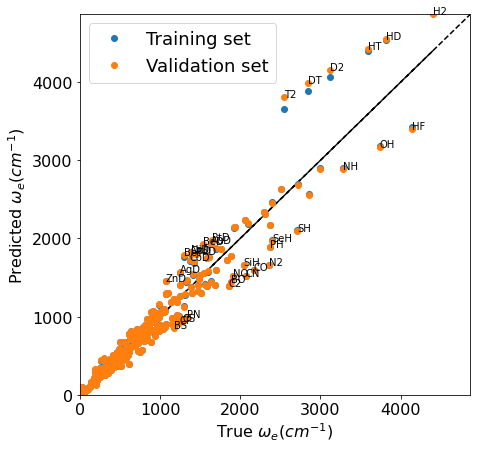

In [12]:
re_train_preds,re_test_preds,out,fig,ax=plot_results(gw_expand,'True $\omega_e (cm^{-1})$','Predicted $\omega_e (cm^{-1})$','omega_e (cm^{-1})',r_y_train_preds,r_y_test_preds);
pyplot.savefig('w_lr_1.svg')
for i in range(len(re_test_preds)):
    if abs(gw_expand['omega_e (cm^{-1})'].tolist()[i]-re_test_preds[i])<300:
        continue
    ax.annotate(gw_expand['Molecule'].tolist()[i], (gw_expand['omega_e (cm^{-1})'].tolist()[i], re_test_preds[i]))
pyplot.savefig('w_lr_1_annot.svg')

In [19]:
results('$\omega_e (cm^{-1})$ LR results with features $p_1+p_2$, $g_1+g_2$, $ln(Z_1 \times Z_2)$, $R_e (A)$',gw_expand,'omega_e (cm^{-1})',re_test_preds,310,MAE,RMSE,R,r"stat_summ.csv")

,"$\omega_e (cm^{-1})$ LR results with features $p_1+p_2$, $g_1+g_2$, $ln(Z_1 \times Z_2)$, $R_e (A)$"
$r%$,5.168999152117756
MAE,133.90895499369367
Number of molecules in the whole data set,310
RMSE,226.59408780127583


In [20]:
split_stat = pd.DataFrame(list(zip(Train_MAE,Train_RMSE,Train_R,MAE,RMSE,R)),columns =['Train_MAE','Train_RMSE','Train_R','MAE','RMSE','R'])
split_stat.to_csv('split_stat.csv')
gw_expand['re_test_preds']=re_test_preds
gw_expand['re_train_preds']=re_test_preds
#re_train_preds,re_train_std
gw_expand.to_csv('gw_expand_pred.csv')